# Music Genre Prediction using Machine Learning

This dataset holds data more than 50000 songs, each described with 18 features.The focus is put on interpreting classification results

The work follows the standard approach; load, explore, and clean the data(EDA), pre-process, search for the best performing hyper-parameters, feeding data through the chosen algorithm, model evaluation, and interpretation 

# Importing 

In [9]:
%matplotlib inline

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# I. Load data


In [12]:
music = pd.read_csv('music_genre.csv')
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


# II. Explore and clean Data
The code line below shows that there are 50005 entries in the dataset, each describe with 18 features

In [13]:
music.shape

(50005, 18)

# II.1. Removing duplicates

In [14]:
music.duplicated().any()


True

In [15]:
duplicated = music.duplicated()

Duplicated rows are shown as follows, there are 4 lines holding NaN values

In [16]:
music[duplicated]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The code line below loads the entries above and below NaN containing samples to double check for duplicated rows. It validates the identity of samples 10000, 10001, 10002, 10003, and 10004. These are not just repeated, but also contain only NaNs. As a result, they have been removed.

In [17]:
music.iloc[9999:10006]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9999,41509.0,Hachioji P,Yeah! Yeah!! Yeah!!!,14.0,0.02000,0.573,226374.0,0.921,0.000004,F#,0.325,-3.841,Major,0.0734,135.029,4-Apr,0.599,Anime
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,77089.0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.621,0.029700,G,0.159,-7.429,Major,0.0382,142.065,4-Apr,0.607,Jazz


In [18]:
music.drop([1000, 10001, 10002, 10003, 10004], inplace = True)

In [19]:
music.shape

(50000, 18)

# II.2. Remove high-entropy features

Entropy is the measurement of disorder or impurities in the information processed in machine learning.
If entropy is higher then it will be difficult to draw any conclusion from that piece of information.

In [20]:
# instance_id holds information about a song's ID, it is all unique as shown below
len(music["instance_id"].unique()) 

50000

artist_name holds the information about that singers' name.

In [21]:
len(music["artist_name"].unique())

6864

A major key song is built on a major scale. A minor key song is based on a minor scale. The seven notes of the C major scale - C, D, E, F, G, A, and B - are central to a song written in the 'key of C major.' That is, the fundamental notes that comprise the melody, chords, and bassline of the song are all derived from that group of notes. There are 12 major keys since there are 12 major scales. Similarly, there are 12 minor scales and, as a result, 12 minor keys. So there are a total of 24 keys. The feature contains 12 distinct values (letters) that should be read in conjunction with the mode column. Key is preserved in the data since their number is not very large.

In [22]:
music["key"].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#',
       nan], dtype=object)

In music, there are two types of tonalities: major and minor. Tonality describes a key's emotional personality. There is generally a difference between two characters, modes, or endpoints of a spectrum in real life. Light and darkness, happiness and sadness, good and bad, light and heavy, and so on are some examples. This same law of contrast is responsible for the existence of two tonalities in music: major tonality and minor tonality. A quick look at the mode column reveals that these are the values in this feature.

In [23]:
music["mode"].unique()

array(['Minor', 'Major', nan], dtype=object)

obtained_date is not very informative since it shows one of 4 days in April (year not provided). It is not clear what these values mean. Therefore, the feature is removed from the dataset.

In [24]:
music["obtained_date"].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', nan, '0/4'], dtype=object)

The target column - the one that will be predicted - is music genre. It stores the labels of each sample, i.e. the class to which it belongs. The code line following lists all of its unique values.

In [25]:
music["music_genre"].unique()

array(['Electronic', 'Anime', nan, 'Jazz', 'Alternative', 'Country',
       'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

The dataset index was reset since 5 rows were removed earlier (see below).



In [26]:
music.reset_index(inplace = True)

Non-predictive features such as index, instance id, track name (each entry has a unique track name), and obtained date can now be eliminated. A quick check demonstrates how the dataset looks after this basic cleanup.

In [27]:
music = music.drop(["index", "instance_id", "track_name", "obtained_date"], axis = 1)

In [28]:
music.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


# II.3. Explore artists

It would be interesting to know how many songs each artist has in this dataset. Many examples have the value "empty field" (see the code line below). It outnumbers all artists and distorts song count displays.

In [29]:
music[music["artist_name"] == "empty_field"]

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
19,empty_field,50.0,0.02810,0.656,307328.0,0.653,0.858000,F#,0.1120,-11.883,Minor,0.0396,117.999,0.1990,Electronic
25,empty_field,34.0,0.02360,0.715,221050.0,0.978,0.000493,D,0.2160,-1.538,Major,0.3620,125.109,0.4180,Electronic
44,empty_field,31.0,0.00350,0.595,222147.0,0.904,0.003780,D,0.0533,-6.805,Minor,0.0349,127.61,0.8410,Electronic
128,empty_field,32.0,0.01390,0.498,-1.0,0.945,0.647000,F,0.3380,-0.003,Minor,0.1370,149.888,0.1790,Electronic
135,empty_field,44.0,0.15300,0.792,265133.0,0.549,0.379000,F,0.3430,-9.855,Major,0.0456,120.01299999999999,0.4760,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49937,empty_field,50.0,0.05480,0.754,132414.0,0.840,0.000014,A,0.1500,-5.111,Major,0.3130,144.991,0.0397,Hip-Hop
49951,empty_field,52.0,0.13300,0.867,-1.0,0.618,0.000002,B,0.1280,-4.956,Minor,0.0614,140.005,0.8570,Hip-Hop
49966,empty_field,51.0,0.12400,0.786,187027.0,0.738,0.000000,C,0.1400,-5.621,Major,0.3890,93.758,0.7800,Hip-Hop
49986,empty_field,53.0,0.00392,0.770,211820.0,0.905,0.000003,F,0.1690,-8.235,Minor,0.1440,135.999,0.4640,Hip-Hop


In [30]:
artists = music["artist_name"].value_counts()[:20].sort_values(ascending = True)
artists

Ryuichi Sakamoto              90
$uicideBoy$                   92
Logic                         92
Howard Shore                  93
Mac Miller                    97
Kevin Gates                  102
Pyotr Ilyich Tchaikovsky     103
The Black Keys               114
Thievery Corporation         122
Future                       124
Eminem                       147
Yuki Hayashi                 167
Capcom Sound Team            169
Drake                        172
Frédéric Chopin              241
Johann Sebastian Bach        314
Ludwig van Beethoven         317
Wolfgang Amadeus Mozart      402
Nobuo Uematsu                429
empty_field                 2489
Name: artist_name, dtype: int64

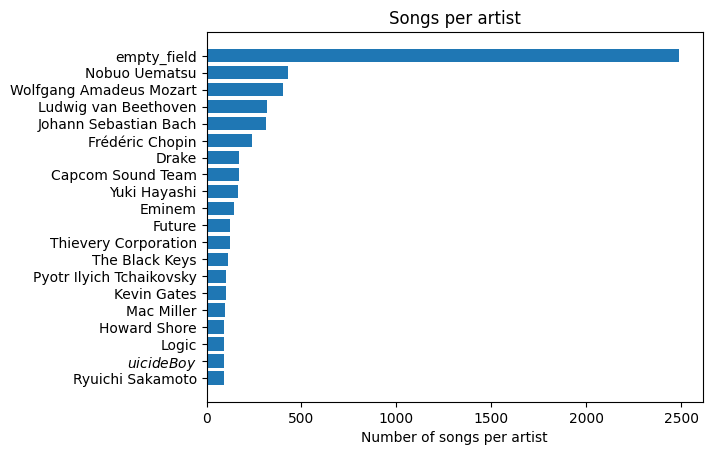

In [31]:
plt.barh(artists.index, artists)
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show()

To make this visualisation more informative, all samples with "empty field" in artist name were eliminated. It should be noted that the figure below only includes the first 20 artists with the most songs in the data.

In [32]:
music = music.drop(music[music["artist_name"] == "empty_field"].index)

In [33]:
top_20_artists = music["artist_name"].value_counts()[:20].sort_values(ascending = True)

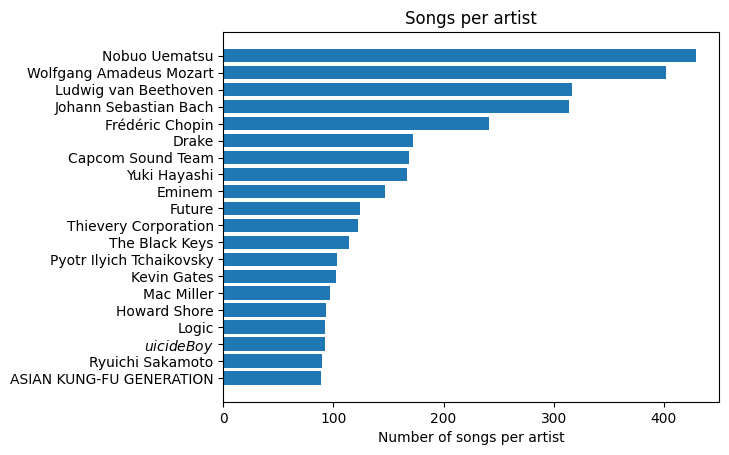

In [34]:
plt.barh(top_20_artists.index, top_20_artists)
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show()

The dataset appears to have been gathered by Japanese authors or in Japan, given several musicians in the top20. Furthermore, numerous composers (e.g., Mozart, Beethoven, etc.) were included on this list. The artist name has been eliminated in order to avoid a huge number of features.

In [35]:
music.drop("artist_name", axis = 1, inplace = True)

A brief scan reveals that the majority of the features are numerical values, with the exception of three columns that contain category data. The following chapter delves deeper into each feature.

In [36]:
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


# III. Visualize data

Visualizing counts and distributions simplifies data overview and comprehension. The graphs below show the counts in each of the three categorical features for each class.


In [37]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = music, palette = "ocean", order = order)
    plt.title(f"Counts in each {feature}")
    plt.show()

The graph below depicts how many times each key appears in the dataset. G is the most common, followed by C, with only 1500 entries.

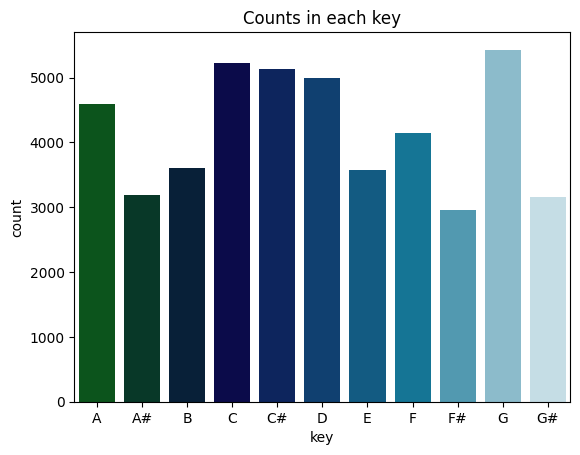

In [38]:
plot_counts("key", ["A", "A#", "B", "C", "C#", "D", "E", "F", "F#", "G", "G#"])

The majority of songs are at the "major" end of the musical scale (see below).

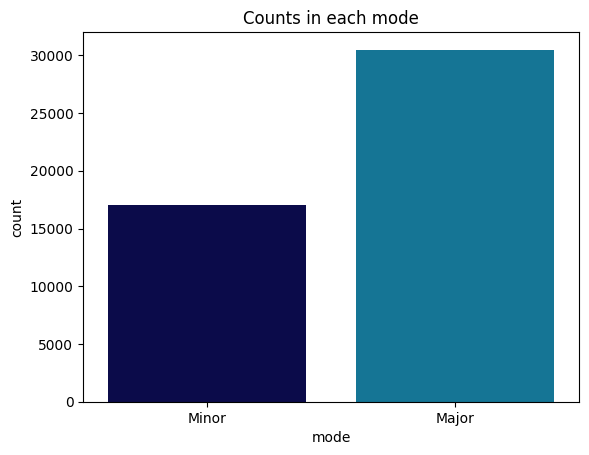

In [39]:
plot_counts("mode")

On the other hand, each genre is evenly represented; no classes are over-represented or under-represented.

To save time and space, the distribution of continuous values in numeric characteristics is displayed on subplots. It was discovered that the tempo column contains faulty values. Tempo refers to the rate at which a piece of music should be performed. In this feature, certain samples (4720) have a question mark (?) instead of floats (see below).

In [41]:
music[music["tempo"] == "?"]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
5,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,0.6140,Electronic
32,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,0.1380,Electronic
35,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,0.2390,Electronic
36,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,0.7270,Electronic
39,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49913,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,0.1440,Hip-Hop
49959,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,0.8860,Hip-Hop
49962,62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,0.2210,Hip-Hop
49971,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,?,0.5890,Hip-Hop


In general, incorrect values could be replaced by estimated (right, plausible) values or those of neighboring cells, but in this case, this strategy is not practicable. Because the sequence of the rows is arbitrary, assigning a value similar to the one in the prior or next sample would be impossible. Similarly, the mode or median of a feature would be incorrect. A possible solution to this problem is to categorize samples by genre and enter a mean tempo value for each class. To keep the process as simple as feasible, all rows with incorrect tempo values are eliminated. Following that, their type is changed to "float."

In [42]:
music = music.drop(music[music["tempo"] == "?"].index)

In [43]:
music["tempo"] = music["tempo"].astype("float")

In [44]:
music["tempo"] = np.around(music["tempo"], decimals = 2)

Distributions can only be displayed for features with numerical values. As a result, they are kept in a distinct variable.

In [45]:
numeric_features = music.drop(["key", "music_genre", "mode"], axis = 1)

The following code lines show the distributions of all numerical features on subplots. They are then interpreted.

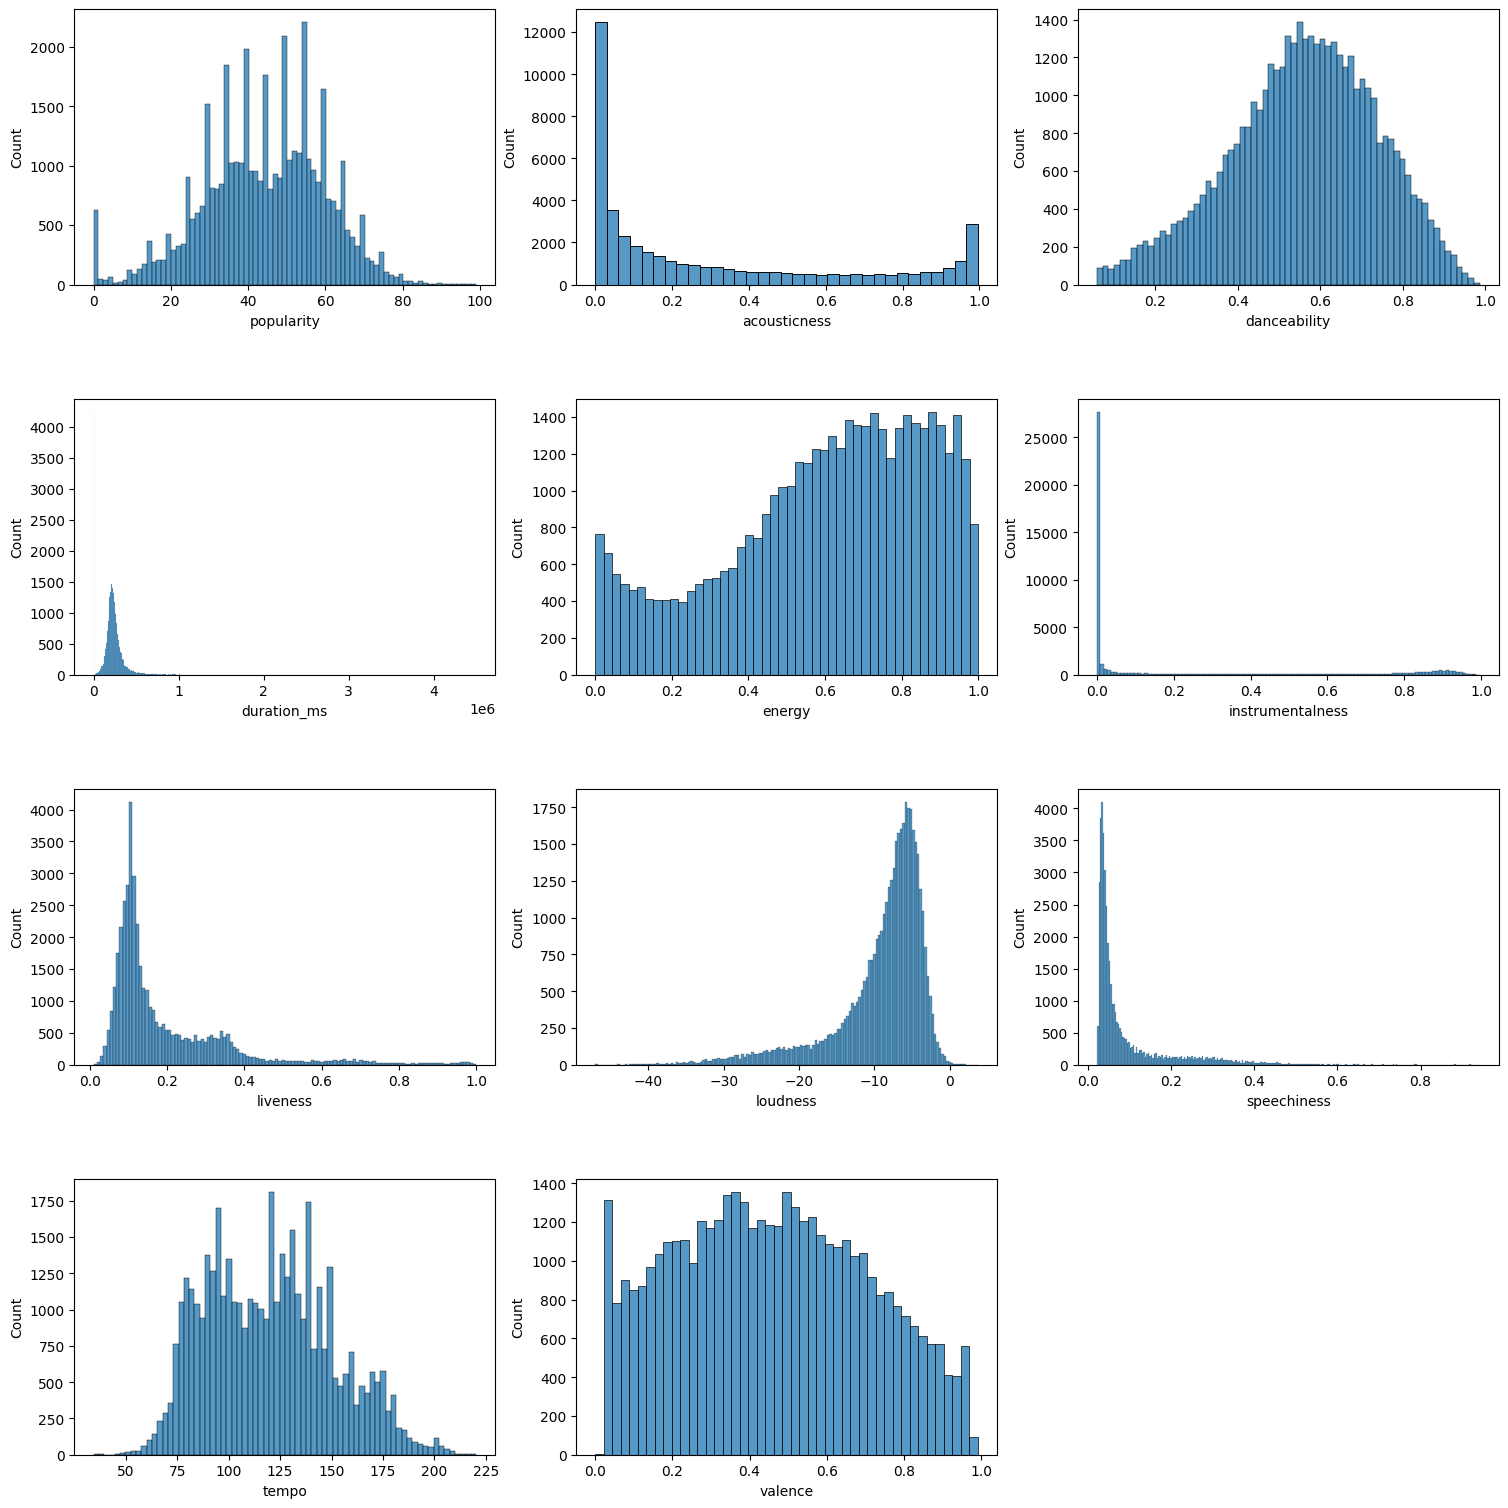

In [46]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
index = 0

axs = axs.flatten()
for k, v in numeric_features.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

The distribution of popularity is bimodal, with maxima at roughly 48 and 55. Some values have substantially greater frequencies than others. In truth, it's unclear what "popularity" implies in this context - the number of weeks in a chart, or the amount of points acquired after a poll (for example).

Acousticity is assessed on a scale of 0.0 (not acoustic) to 1.0 (extremely acoustic) (very acoustic). Acoustic and non-electronic instruments are more likely to be used in songs with a higher acousticness. The second subplot demonstrates that the majority of songs and music pieces are not acoustic.

The danceability of a track is determined by a mixture of musical factors such as pace, rhythm, and beat. Songs with a higher danceability have more consistent and stronger beats. Danceability, like acousticness, is rated on a scale of 0.0 (low danceability) to 1.0 (high danceability) (high danceability). Values in this attribute have a more or less normal distribution in terms of danceability.

Music duration is given in milliseconds. Most samples are not longer than 0.3e6 (300 000) milliseconds, or 300 seconds, or exactly 5 minutes. Sounds reasonable.

The perceived intensity and activity of a music is measured by energy. Energy is also quantified on a scale from 0.0 (low energy) to 1.0 (high energy) (high energy). Higher intensity songs are more passionate, energetic, and loud. The distribution on the fifth subplot reveals that the majority of the music pieces are described with energy.

Instrumentality, on the other hand, predicts whether a piece has vocals. The level of instrumentality is scaled from 0.0 (probably contains vocal content) to 1.0. (likely contains no vocal content). Instrumental songs are less likely to have vocals. The distribution of values in terms of instrumentalness is extremely skewed - most samples have a value of 0 or close to 0, indicating that the songs contain vocal content.

The presence of an audience in a song is detected by liveness. Liveness is also graded on a scale of 0.0 (no audience) to 1.0 (large audience) (audible audience). Songs having a higher liveness have a better chance of being performed live. The songs in our dataset appear to be performed without an audience, as most liveness ratings are near to 0.0 rather than 1.0.

The next characteristic is loudness, which measures a song's decibel level. Because decibels are relative to a reference value, songs with lower loudness values are quieter than songs with higher loudness values. Taking this into consideration, the value distribution in loudness reveals that the majority of music samples are quieter (their loudness is closer to 0).

The presence of spoken words in a music is measured by speechiness. It is graded on a scale of 0.0 (no speechiness) to 1.0 (extreme speechiness) (high speechiness). Songs with a higher level of speechiness are largely made up of spoken words, similar to poetry or a talk show. The distribution of speechiness is tilted to the right - most songs/pieces appear to have no or very few spoken words.

A song's tempo is measured in beats per minute (bpm). Many popular songs have tempos ranging from 50 to 200 beats per minute. Songs with a greater tempo move faster. The distribution of tempo values resembles that of "popularity."

Finally, valence assesses a song's positive. It is graded on a scale of 0.0 (low valence) to 1.0 (high valence) (high valence). Higher valence songs sound happier and more cheery. The valence distribution in our sample is not normal; the valence of most songs ranges between 0.2 and 0.7. Only a small percentage of songs have a high valence.

The code lines below will assist you in presenting numerical features on boxplots. The latter are extremely effective for detecting outliers, or extreme or incorrect values in a feature. Outliers may skew model training and inference. As a result, removing them is a good practice (where possible and justifiable). A summary of outliers is provided below the graphs.

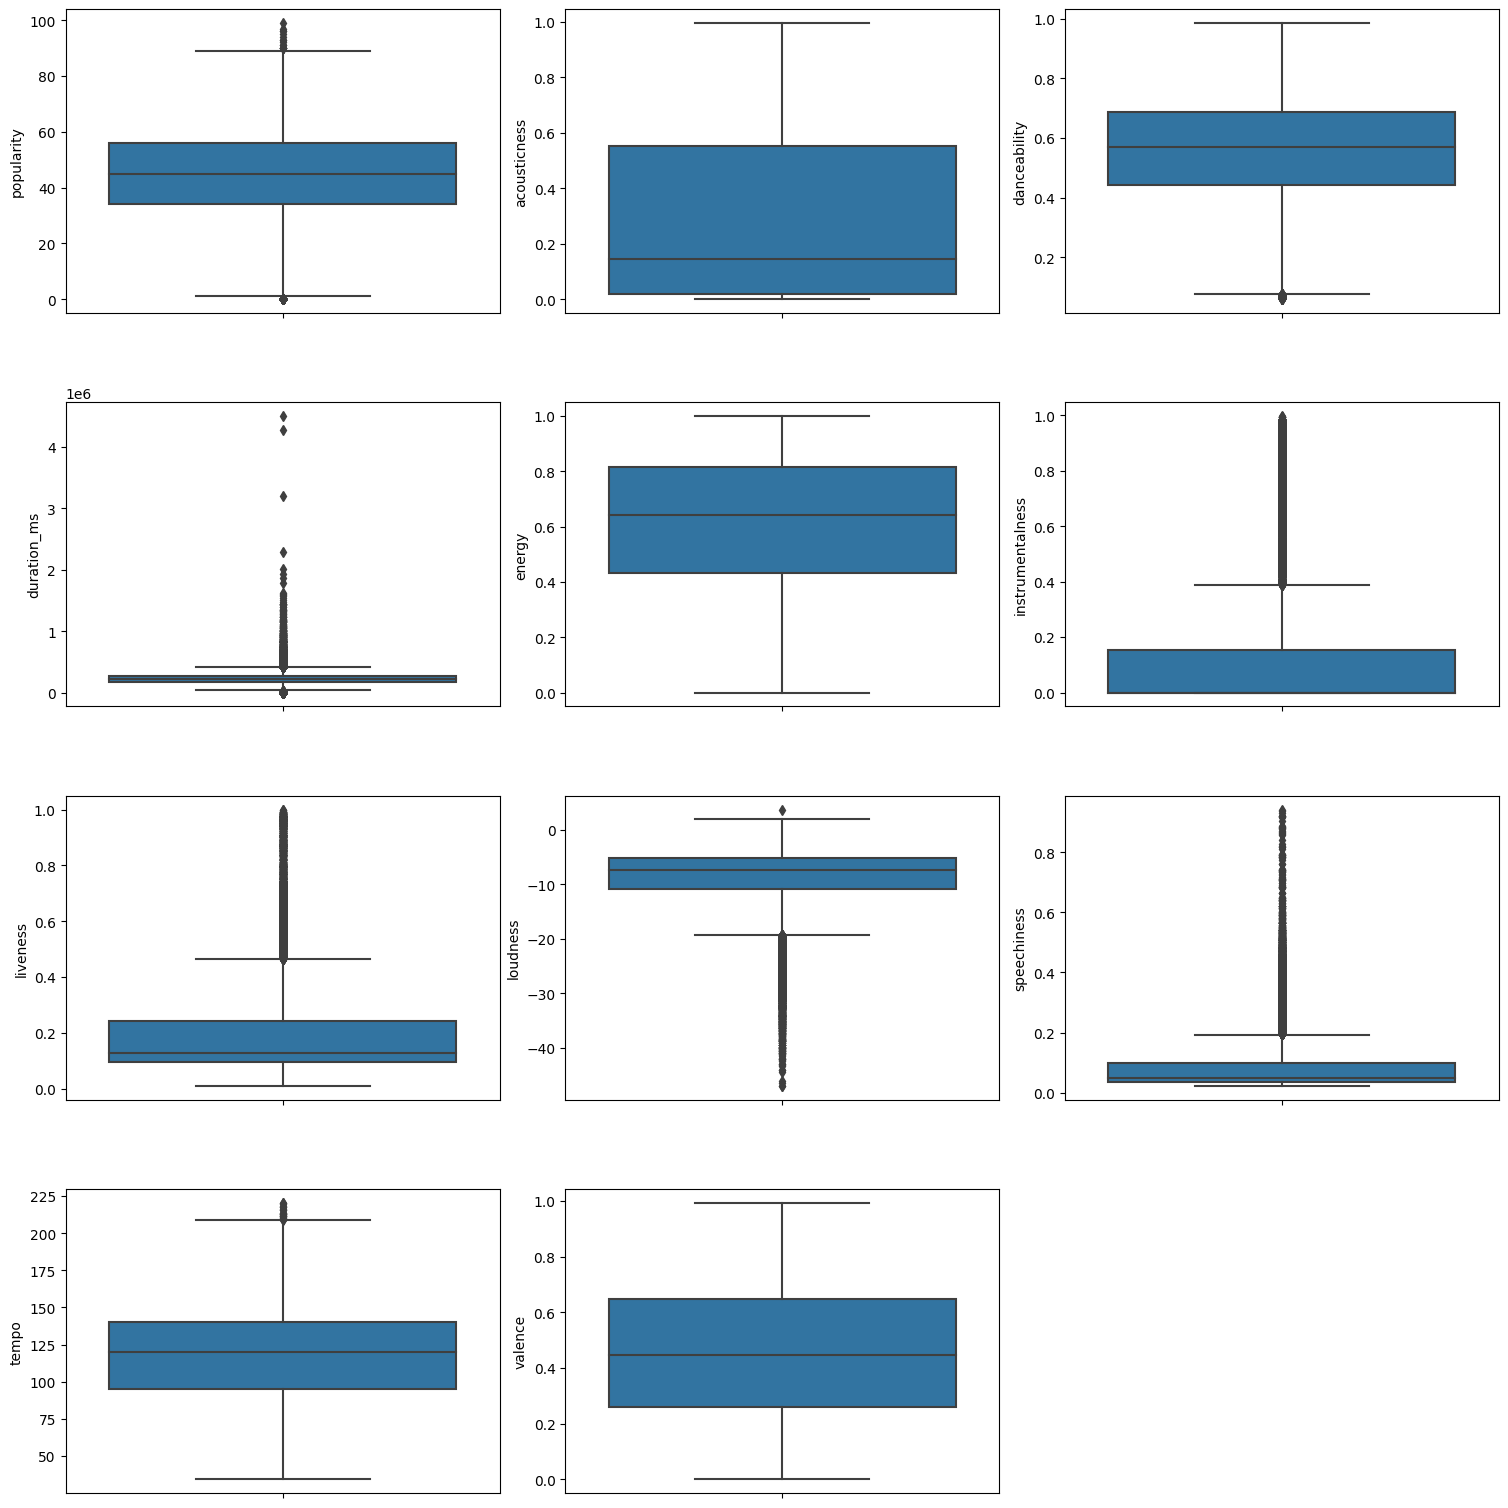

In [47]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in numeric_features.items():
    sns.boxplot(y = k, data = numeric_features, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

There are a few outliers in popularity, danceability, and tempo. On the other side, there are numerous extreme values in duration, instrumentlness, liveness, loudness, and speechiness. Outliers are not deleted because the ultimate goal of this exercise is to interpret classification outputs rather than devise the best model.

# VI. Encode categorical data

Most Machine Learning algorithms are incapable of working with strings; they expect numerical values in each feature. It is better to one-shot encode categorical features (those with string values), i.e., to increase the number of features so that each class's values are placed in a distinct column. Where the sample corresponds to the provided class, it receives a 1 in the corresponding feature; all others receive a zero. Instead, in this experiment, categorical data are encoded using LabelEncoder (). Each class is given a number (integer). As a result, five unique classes in a categorical variable will receive values ranging from 0 to 4. It is worth noting that LabelEncoder() remembers the classes. As a result, an encoder is created for each classified variable. The labels (i.e., the music genre) are not encoded, which simplifies and clarifies interpretation. String labels are accepted by tree-based algorithms.

# VI.1. Encode key feature

In [48]:
key_encoder = LabelEncoder()

In [49]:
music["key"] = key_encoder.fit_transform(music["key"])

In [50]:
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,Minor,0.0748,100.89,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic


Values in key column were successfully encoded. Corresponding classes are displayed below.

In [51]:
key_encoder.classes_

array(['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#',
       nan], dtype=object)

# IV.2. Encode mode feature

In [52]:
mode_encoder = LabelEncoder()

In [53]:
music["mode"] = mode_encoder.fit_transform(music["mode"])

In [54]:
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.89,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.00,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.99,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.01,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.04,0.323,Electronic


mode column was successfully encoded, too. Classes are memorized by the encoder as shown below.

In [55]:
mode_encoder.classes_

array(['Major', 'Minor', nan], dtype=object)

# V. Preprocess data

Preporcessing involves preparing the dataset for modelling. Labels are separated from features; the latter are scaled; both sets are split into training, validation, and testing data.

# V.1. Separate labels from features

In [56]:
music_features = music.drop("music_genre", axis = 1)
music_labels = music["music_genre"]

# V.2. Scale features

Scaling data means to make all values in all variables within the same range. MinMaxScaler() (i.e., to make all values between 0 and 1) is the most widely used scaling technique. However, StandardScaler() handles much better datasets with outliers. It makes all values centered around 0 with standard deviation of 1. The steps are executed below.

In [57]:
scaler = StandardScaler()

In [58]:
music_features_scaled = scaler.fit_transform(music_features)

In [59]:
data=pd.DataFrame(music_features_scaled)
data.mean().sum()

-6.21226746894394e-15

In [60]:
data.std().sum()

13.000151906767304

# V.3. Split data into train, validation, and test set

The data is divided into three sets: train, validation, and test. The algorithm is trained using the first, validated using the second, and tested using the third. A small percentage is set aside for testing. A similar number of samples were reserved for validation. The code lines following are used to split the data. Following that, the form of the sets is examined.

In [61]:
tr_val_f, test_features, tr_val_l, test_labels = train_test_split(
    music_features_scaled, music_labels, test_size = 0.1, stratify = music_labels)

ValueError: Input contains NaN

In [ ]:
train_features, val_features, train_labels, val_labels = train_test_split(
    tr_val_f, tr_val_l, test_size = len(test_labels), stratify = tr_val_l)

NameError: name 'tr_val_f' is not defined

In [ ]:
train_features.shape, train_labels.shape, val_features.shape, val_labels.shape, test_features.shape,   test_labels.shape

NameError: name 'train_features' is not defined

# VI. Modelling 

There are various classification algorithms. Random Forest is quite a common one. Its success, i.e., how well it will be capable to predict a label, will be measured with several success metrics. The most popular ones are "accuracy" and "f1 score". The former shows the ratio between true predictions and all samples ( accuracy=TP+TNTP+TN+FP+FN ). "f1 score" is the harmonic mean between "precision" ( TPTP+FP ) and "recall" ( TPTP+FN ). It is computed with the following formula:  f1score=2TP2TP+FP+FN .

GridSearchCV() is used to find a combination of hyper-parameters that returns the highest success metrics. It requires specifying one success metric; it is better to use "f1_score" instead the default one ("accuracy"). In general, "accuracy" is preferred when the class distribution is similar, while "f1_score" is used for imbalanced classes. Despite the similar distribution of genres in the music dataset, "f1_score" is a little bit more reliable. It should be instantiated with make_scorer before being passed to GridSearch().



In [ ]:
f1 = make_scorer(f1_score, average = "weighted")


The most important configurable hyper-parameters for RandomForestClassifier() are the number of estimators (i.e., the number of trees that will detect the associations between data points) and their maximum depth - the number of levels with nodes where calculations happen. Another relevant hyper-parameter is the amount of samples per leaf, which indicates the bare minimum of samples necessary at a leaf node. A dictionary defines a range of values for each hyper-parameter. The number of folds for cross-validation is supplied to the searching algorithm.

In [ ]:
params = {
    "n_estimators": [10, 15, 20, 25, 30, 35],
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = params, scoring = f1, cv = 5)


The training data is passed to the instantiated search algorithm. It will be utilized to determine the hyper-parameter combination that produces the highest "f1 score."

In [ ]:
grid_search.fit(train_features, train_labels)


NameError: name 'train_features' is not defined

In [ ]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

The best performing model is 35 trees, each with 15 nodes and 4 samples per leaf. The classifier determines these values.

In [ ]:
model = RandomForestClassifier(n_estimators = 35, max_depth = 15, min_samples_leaf = 4)


In [ ]:
model.fit(train_features, train_labels)


NameError: name 'train_features' is not defined

# VII. Model Performance

# VII.1. Accuracy and f1 score

All computations related to the classification process are wrapped in a function to save space and time. It predicts labels and measures model performance using "accuracy" and "f1 score."

In [ ]:
def classification_task(estimator, features, labels):
    """
    Evaluates classification by predicting ("predict") and evaluation ("score") of the modelling alogirthm.
    
    Arguments: 
        Estimator, features (X) and labels (y).
    
    Returns: 
        Model's performance measured in terms of accuracy and f1_score.
    """
    predictions = estimator.predict(features)
    
    print(f"Accuracy: {accuracy_score(labels, predictions)}")
    print(f"F1 score: {f1_score(labels, predictions, average = 'weighted')}")

In [ ]:
classification_task(model, train_features, train_labels)


NameError: name 'train_features' is not defined

In [ ]:
classification_task(model, val_features, val_labels)


NameError: name 'val_features' is not defined

In [ ]:
classification_task(model, test_features, test_labels)


NameError: name 'test_features' is not defined

The model achieves 80% "accuracy" and "f1 score" on train data but only around 56% on validation and test samples, which is a poor performance.

# VII.2. Classification report

For each class, the classification report displays the "precision," "recall," and "f1" scores. As can be seen, the model does poorly at guessing the label of rock and alternative songs but excels at classical music.

In [ ]:
print(classification_report(test_labels, model.predict(test_features)))


NameError: name 'test_labels' is not defined

# VII.3. Confusion matrix

The confusion matrix displays the number of correctly and incorrectly identified samples. The lines of code below load it. Following that, the results are interpreted.

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(test_labels, model.predict(test_features)),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = model.classes_,
    yticklabels = model.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

NameError: name 'test_labels' is not defined

<Figure size 576x432 with 0 Axes>

Samples that have been correctly categorised are shown on the diagonal as red squares. True Positives (accurate predictions) were found to outnumber False Positives. Wrong guesses are found both below and above the diagonal. The 140 tracks' genre was correctly predicted as "Alternative." Twelve were labeled "Anime," twenty as "Blues," and so on, but their true classification was "Alternative." On the other hand, four songs labeled "Alternative" were actually "Anime," six were "Blues," and so on.

# VII.4 Feature importance

Tree-based methods compute feature significance, or the importance of each feature to model performance. It appears (see the output below) that popularity (feature No. 1), acousticness, and danceability were the most helpful in determining a song's genre.

In [ ]:
model.feature_importances_

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# VII.5. ROC curve

The ROC curve is a prominent classification statistic (Receiver Operating Characteristic curve). It is a graph that depicts a classification model's performance across all categorization levels. The True Positive Rate and False Positive Rate are plotted on this graph. The likelihood that a random positive example is positioned to the right of a random negative example is represented by the Area Under the Curve (AUC). AUC values vary from 0 to 1. A model with 100% incorrect predictions has an AUC of 0.0; one with 100% correct predictions has an AUC of 1.

AUC and ROC curves necessitate the computation of probability prediction scores. These indicate the likelihood that a given sample belongs to a specific class.

In [ ]:
predicted_labels = model.predict_proba(test_features)

NameError: name 'test_features' is not defined

In [ ]:
roc_auc_score(test_labels, predicted_labels, multi_class = "ovr")


NameError: name 'test_labels' is not defined

AUC of 92% is a very respectable result. This demonstrates that many samples were correctly predicted. Curves in the upper-left corner indicate a high-performing model.

In [ ]:
skplt.metrics.plot_roc(test_labels, predicted_labels)
plt.show()

NameError: name 'test_labels' is not defined